In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import skfuzzy as fz
from skfuzzy import control as ctrl
import math

In [2]:
#Setup variables for universe and their ranges
#Input with respect to object
distance = ctrl.Antecedent(np.arange(0, 10, 0.5), 'distance')
angle    = ctrl.Antecedent(np.arange(0, 90, 1), 'angle')

#Resulting action to take
speed = ctrl.Consequent(np.arange(0, 5, 0.2), 'speed')
steer  = ctrl.Consequent(np.arange(0, 90, 1), 'steer')

/home/theonidus/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


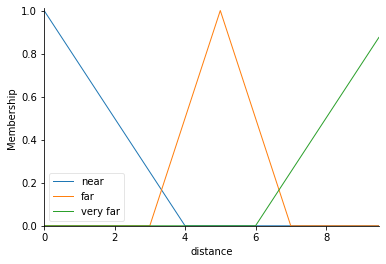

In [3]:

#Set up custom memberships for each variable and output
distance['near'] = fz.trimf(distance.universe, [0, 0, 4]) 
distance['far'] = fz.trimf(distance.universe,  [3, 5, 7]) 
distance['very far'] = fz.trimf(distance.universe,  [6, 10, 10])

#seems to be broken outside of using this in ipython. *smh*
distance.view()

/home/theonidus/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


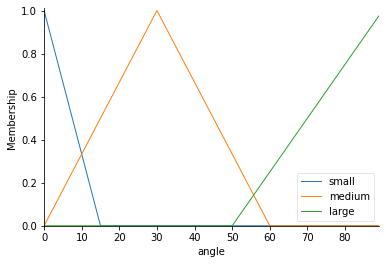

In [4]:

#Set up custom memberships for each variable and output
angle["small"] = fz.trimf(angle.universe, [0, 0, 15]) 
angle["medium"] = fz.trimf(angle.universe,  [0, 30, 60]) 
angle["large"] = fz.trimf(angle.universe,  [50, 90, 90])

#seems to be broken outside of using this in ipython.
angle.view()

/home/theonidus/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


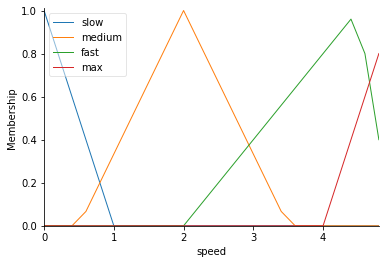

In [5]:

#Set up custom memberships for each variable and output
speed['slow'] = fz.trimf(speed.universe, [0, 0, 1]) 
speed['medium'] = fz.trimf(speed.universe,  [0.5, 2, 3.5]) 
speed['fast'] = fz.trimf(speed.universe,  [2, 4.5, 5])
speed['max'] = fz.trimf(speed.universe,  [4, 5, 5])

#seems to be broken outside of using this in ipython.
speed.view()

/home/theonidus/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


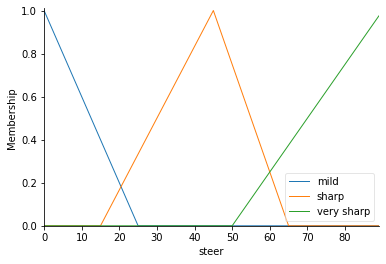

In [6]:
#Set up custom memberships for each variable and output
steer['mild'] = fz.trimf(steer.universe, [0, 0, 25]) 
steer['sharp'] = fz.trimf(steer.universe,  [15, 45, 65]) 
steer['very sharp'] = fz.trimf(steer.universe,  [50, 90, 90])


#seems to be broken outside of using this in ipython.
steer.view()

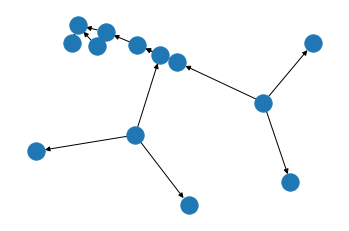

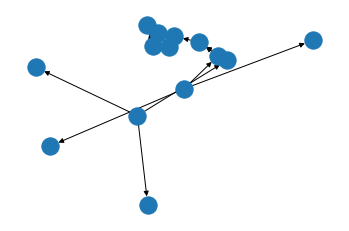

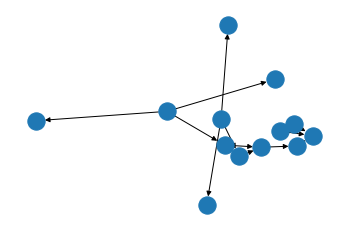

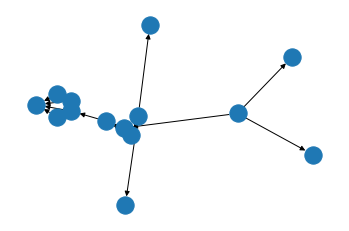

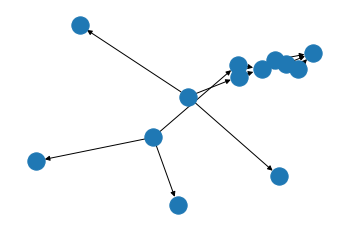

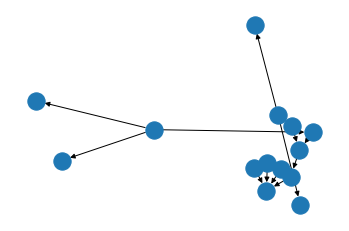

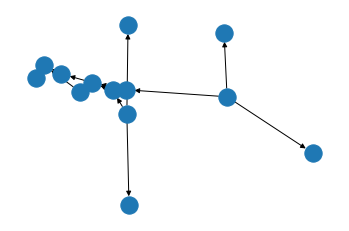

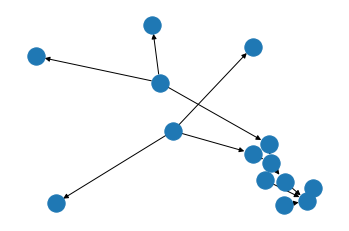

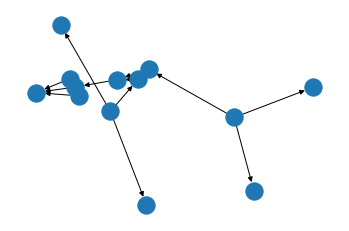

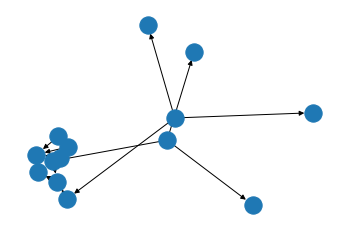

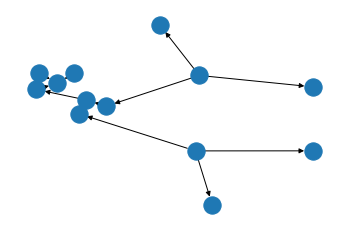

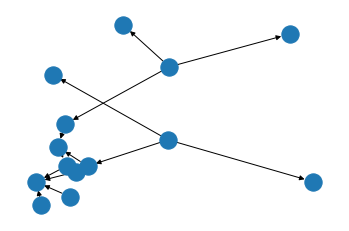

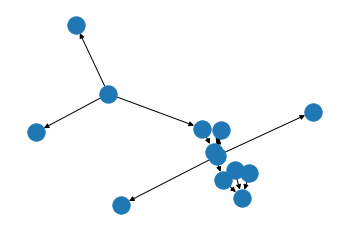

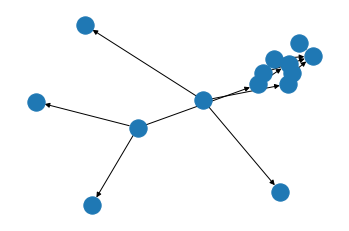

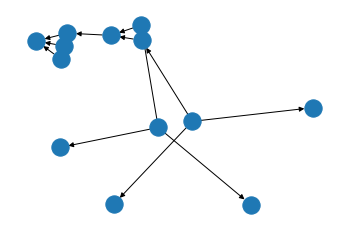

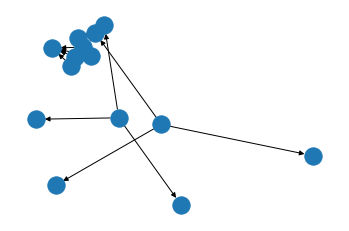

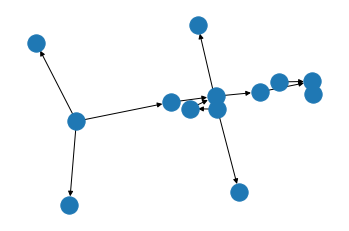

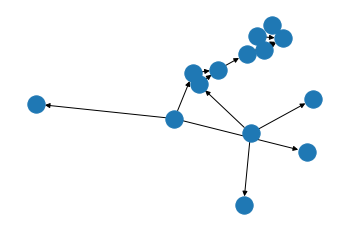

In [7]:
rules = []
rules.append(ctrl.Rule(distance['near'] & angle['large'], steer['mild']))
rules.append(ctrl.Rule(distance['near'] & angle['large'], speed['fast']))

rules.append(ctrl.Rule(distance['near'] & angle['medium'], steer['sharp']))
rules.append(ctrl.Rule(distance['near'] & angle['medium'], speed['medium']))

rules.append(ctrl.Rule(distance['near'] & angle['small'], steer['very sharp']))
rules.append(ctrl.Rule(distance['near'] & angle['small'], speed['slow']))


rules.append(ctrl.Rule(distance['far'] & angle['large'], steer['mild']))
rules.append(ctrl.Rule(distance['far'] & angle['large'], speed['fast']))

rules.append(ctrl.Rule(distance['far'] & angle['medium'], steer['sharp']))
rules.append(ctrl.Rule(distance['far'] & angle['medium'], speed['medium']))

rules.append(ctrl.Rule(distance['far'] & angle['small'], steer['sharp']))
rules.append(ctrl.Rule(distance['far'] & angle['small'], speed['medium']))


rules.append(ctrl.Rule(distance['very far'] & angle['large'], steer['mild']))
rules.append(ctrl.Rule(distance['very far'] & angle['large'], speed['max']))

rules.append(ctrl.Rule(distance['very far'] & angle['medium'], steer['mild']))
rules.append(ctrl.Rule(distance['very far'] & angle['medium'], speed['fast']))

rules.append(ctrl.Rule(distance['very far'] & angle['small'], steer['mild']))
rules.append(ctrl.Rule(distance['very far'] & angle['small'], speed['medium']))

for rule in rules:
    rule.view()

In [8]:
ctrl_system = ctrl.ControlSystem(rules)
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_system)

Start step: steer:0 speed:0
step#:0
Ang to Obs:[90.] dist:[6.5]
Start step: steer:[11.01190476] speed:[3.54970687]
Ang to Obs:[101.01190476] dist:[6.5]
Start step: steer:[8.75533798] speed:[3.76830085]
Ang to Obs:[100.30980383] dist:[5.50354971]
Start step: steer:[11.01403994] speed:[3.54949026]
Ang to Obs:[101.68256464] dist:[3.00152164]
Start step: steer:[11.01851258] speed:[3.54903653]
Ang to Obs:[102.57181469] dist:[3.00470804]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.99724131] dist:[9.50824301]
Start step: steer:[8.33841463] speed:[3.79926335]
Ang to Obs:[99.31273138] dist:[4.99920012]
Start step: steer:[9.72482167] speed:[3.67978231]
Ang to Obs:[100.80778715] dist:[2.00224525]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.14912511] dist:[10.01077733]
Start step: steer:[9.74213582] speed:[3.67812565]
Ang to Obs:[100.71616946] dist:[6.00858308]
Start step: steer:[9.20105375] speed:[3.72847532]
Ang to Obs:[98.887321] dist:[1.51569027]
Start

Start step: steer:[11.41033529] speed:[3.55560405]
Ang to Obs:[101.34723983] dist:[6.72120515]
Start step: steer:[9.80031236] speed:[4.50339101]
Ang to Obs:[100.98266748] dist:[7.93311994]
Start step: steer:[11.41772073] speed:[3.54993381]
Ang to Obs:[101.05132665] dist:[6.7161279]
Start step: steer:[9.86824756] speed:[3.66594506]
Ang to Obs:[101.07095035] dist:[3.93792381]
Start step: steer:[10.06372344] speed:[4.49412011]
Ang to Obs:[99.62963127] dist:[7.7152632]
Start step: steer:[10.21416767] speed:[3.63128142]
Ang to Obs:[99.59339644] dist:[6.20229677]
Start step: steer:[11.28029452] speed:[3.52253208]
Ang to Obs:[100.53532648] dist:[3.18888252]
Start step: steer:[8.77094029] speed:[4.53207337]
Ang to Obs:[100.08277081] dist:[8.97234996]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.08713426] dist:[10.66710631]
Start step: steer:[9.3087522] speed:[3.71865756]
Ang to Obs:[100.15335983] dist:[1.6224835]
Start step: steer:[9.21396525] speed:[3.72730282]
Ang to Obs:

Start step: steer:[9.83669116] speed:[4.50213378]
Ang to Obs:[99.23718479] dist:[7.90234988]
Start step: steer:[9.60481354] speed:[3.69117076]
Ang to Obs:[99.21851183] dist:[5.94856156]
Start step: steer:[9.78371672] speed:[3.67413215]
Ang to Obs:[99.61516322] dist:[3.97361836]
Start step: steer:[11.11409119] speed:[3.53934807]
Ang to Obs:[100.79244137] dist:[3.4637645]
Start step: steer:[8.33841463] speed:[3.79926335]
Ang to Obs:[99.88639849] dist:[5.0109088]
Start step: steer:[9.43598462] speed:[3.70694129]
Ang to Obs:[100.26554851] dist:[1.74352874]
Start step: steer:[11.05974402] speed:[3.54485534]
Ang to Obs:[101.03821539] dist:[3.48299171]
Start step: steer:[10.41471368] speed:[3.61063013]
Ang to Obs:[98.96996326] dist:[2.56006077]
Start step: steer:[11.27294142] speed:[3.69530231]
Ang to Obs:[100.33855359] dist:[6.81623133]
Start step: steer:[8.34050439] speed:[3.79926335]
Ang to Obs:[99.73098849] dist:[4.94046368]
Start step: steer:[9.00132637] speed:[4.52761621]
Ang to Obs:[10

Start step: steer:[9.84821828] speed:[4.50173372]
Ang to Obs:[100.74943493] dist:[7.89264896]
Start step: steer:[8.54583459] speed:[3.78648993]
Ang to Obs:[98.17936141] dist:[4.65410812]
Start step: steer:[11.08213529] speed:[3.54258578]
Ang to Obs:[101.80122676] dist:[3.47505796]
Start step: steer:[8.76313399] speed:[3.76761399]
Ang to Obs:[97.23318555] dist:[5.50870233]
Start step: steer:[8.84287889] speed:[3.76056979]
Ang to Obs:[99.42351771] dist:[5.55946327]
Start step: steer:[9.10017846] speed:[4.52516218]
Ang to Obs:[99.63486899] dist:[8.5886779]
Start step: steer:[9.03933022] speed:[3.7430651]
Ang to Obs:[99.32079973] dist:[5.67298481]
Start step: steer:[9.3681824] speed:[3.7132016]
Ang to Obs:[99.58327786] dist:[1.67965507]
Start step: steer:[8.42122993] speed:[3.79580439]
Ang to Obs:[98.4667358] dist:[5.21622116]
Start step: steer:[9.84065449] speed:[4.50199632]
Ang to Obs:[100.76628569] dist:[7.89901183]
Start step: steer:[11.26902603] speed:[3.52367102]
Ang to Obs:[100.9406

Start step: steer:[9.97975386] speed:[3.65499114]
Ang to Obs:[100.27697782] dist:[3.89176168]
Start step: steer:[9.30758852] speed:[3.71876411]
Ang to Obs:[98.84099563] dist:[5.81067613]
Start step: steer:[8.84281498] speed:[3.76057545]
Ang to Obs:[98.9398837] dist:[4.44057612]
Start step: steer:[10.15470156] speed:[3.63739431]
Ang to Obs:[100.52250464] dist:[2.35757317]
Start step: steer:[10.27887066] speed:[3.62460547]
Ang to Obs:[99.6532924] dist:[6.22762925]
Start step: steer:[8.64979469] speed:[4.53324393]
Ang to Obs:[97.87560145] dist:[9.1408671]
Start step: steer:[10.70156582] speed:[3.58127465]
Ang to Obs:[101.23896318] dist:[2.77519645]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[97.26174545] dist:[10.30125827]
Start step: steer:[10.56297224] speed:[3.59543377]
Ang to Obs:[101.24175167] dist:[2.67222657]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[97.3996049] dist:[9.92500602]
Start step: steer:[10.87053903] speed:[4.46407202]
Ang to Obs:[10

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.8432169] dist:[11.57408278]
Start step: steer:[10.17233957] speed:[3.63558865]
Ang to Obs:[100.72793266] dist:[2.37156666]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[97.77222452] dist:[11.38709046]
Start step: steer:[10.21953298] speed:[3.63072733]
Ang to Obs:[100.93657487] dist:[3.79559295]
Start step: steer:[9.92207398] speed:[3.66068047]
Ang to Obs:[99.34577693] dist:[3.91551529]
Start step: steer:[8.64449076] speed:[3.77803354]
Ang to Obs:[98.27218495] dist:[4.57439605]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.15640202] dist:[11.38019975]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33742969] dist:[11.2199775]
Start step: steer:[8.47030169] speed:[3.79239618]
Ang to Obs:[99.25931111] dist:[5.27336997]
Start step: steer:[11.33221816] speed:[3.62589086]
Ang to Obs:[102.14390793] dist:[6.77509828]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[9.24778957] speed:[4.521104]
Ang to Obs:[100.08698962] dist:[8.43742856]
Start step: steer:[10.42946617] speed:[4.48073867]
Ang to Obs:[100.58146832] dist:[7.42867853]
Start step: steer:[8.36165582] speed:[3.79895567]
Ang to Obs:[97.61586052] dist:[4.87995506]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.39872453] dist:[10.82958591]
Start step: steer:[10.84166268] speed:[3.56700226]
Ang to Obs:[101.48700896] dist:[3.5611961]
Start step: steer:[10.45347111] speed:[3.60665217]
Ang to Obs:[99.62506654] dist:[2.58959629]
Start step: steer:[8.37163761] speed:[3.7985709]
Ang to Obs:[97.60782243] dist:[4.85973042]
Start step: steer:[8.83127193] speed:[3.76159719]
Ang to Obs:[99.60555088] dist:[4.44772234]
Start step: steer:[10.1644621] speed:[3.63639586]
Ang to Obs:[100.43397284] dist:[2.36532186]
Start step: steer:[9.37373587] speed:[3.7126903]
Ang to Obs:[98.88442975] dist:[4.15753041]
Start step: steer:[8.33841463] speed:[3.79926335]
Ang to Obs:[98.38

Start step: steer:[11.32025058] speed:[3.51849496]
Ang to Obs:[100.50804671] dist:[3.21661404]
Start step: steer:[8.88808951] speed:[3.75656091]
Ang to Obs:[100.41677671] dist:[5.58687318]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.91270507] dist:[10.52811512]
Start step: steer:[8.46943251] speed:[3.79246013]
Ang to Obs:[99.15925499] dist:[4.72755419]
Start step: steer:[8.43502584] speed:[3.79489312]
Ang to Obs:[99.13700877] dist:[5.23347515]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32240926] dist:[11.60297199]
Start step: steer:[11.48010491] speed:[3.50236292]
Ang to Obs:[102.04345416] dist:[3.32663851]
Start step: steer:[8.38938388] speed:[3.79770332]
Ang to Obs:[99.77859448] dist:[4.8291109]
Start step: steer:[10.22149143] speed:[3.6305251]
Ang to Obs:[100.64043965] dist:[2.41035381]
Start step: steer:[8.42527206] speed:[3.79554193]
Ang to Obs:[97.90274968] dist:[4.77860503]
Start step: steer:[10.25318433] speed:[3.62725417]
Ang to Obs:[

Start step: steer:[8.34443035] speed:[3.79926335]
Ang to Obs:[99.0081827] dist:[4.92567286]
Start step: steer:[10.08107368] speed:[4.49349717]
Ang to Obs:[100.94847619] dist:[7.70128549]
Start step: steer:[10.54338701] speed:[3.59743814]
Ang to Obs:[100.2437905] dist:[3.67123339]
Start step: steer:[9.70882658] speed:[3.6813096]
Ang to Obs:[98.89341208] dist:[5.99420411]
Start step: steer:[11.35273649] speed:[3.51521409]
Ang to Obs:[101.26750578] dist:[3.38045431]
Start step: steer:[9.46683984] speed:[3.70407911]
Ang to Obs:[98.99366958] dist:[1.77215459]
Start step: steer:[10.91579992] speed:[3.55946434]
Ang to Obs:[100.9455187] dist:[2.93117208]
Start step: steer:[11.28279827] speed:[3.6825905]
Ang to Obs:[100.07990054] dist:[6.80937694]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.91525024] dist:[10.00247981]
Start step: steer:[9.74012959] speed:[3.67831779]
Ang to Obs:[100.32258664] dist:[3.99227987]
Start step: steer:[8.37394083] speed:[3.79846962]
Ang to Obs:[9

Start step: steer:[8.73376411] speed:[3.77019997]
Ang to Obs:[98.49932772] dist:[5.48909108]
Start step: steer:[11.02777687] speed:[3.54809683]
Ang to Obs:[101.28840077] dist:[3.01130365]
Start step: steer:[10.33173281] speed:[3.61916078]
Ang to Obs:[99.75359953] dist:[2.49628599]
Start step: steer:[10.54908491] speed:[3.59685492]
Ang to Obs:[100.14487865] dist:[3.66909415]
Start step: steer:[11.33890857] speed:[3.51661046]
Ang to Obs:[100.51991285] dist:[6.61476562]
Start step: steer:[9.69998172] speed:[3.68215287]
Ang to Obs:[99.27539862] dist:[1.98073456]
Start step: steer:[9.89024385] speed:[3.6637987]
Ang to Obs:[99.73107496] dist:[6.07126254]
Start step: steer:[8.75786007] speed:[3.76807868]
Ang to Obs:[98.53371876] dist:[4.4947793]
Start step: steer:[9.88122195] speed:[4.50058392]
Ang to Obs:[100.39082376] dist:[7.86500074]
Start step: steer:[8.79329147] speed:[4.531746]
Ang to Obs:[98.45573262] dist:[8.94340416]
Start step: steer:[8.83187474] speed:[4.53111738]
Ang to Obs:[99.3

Start step: steer:[10.04753026] speed:[3.64823794]
Ang to Obs:[100.21501696] dist:[3.86417352]
Start step: steer:[11.03215789] speed:[3.5476525]
Ang to Obs:[100.64947427] dist:[6.50721029]
Start step: steer:[10.31056686] speed:[3.62133983]
Ang to Obs:[99.97868215] dist:[2.47989707]
Start step: steer:[11.11412528] speed:[3.53934462]
Ang to Obs:[100.92225783] dist:[3.07249506]
Start step: steer:[8.53155425] speed:[4.53333333]
Ang to Obs:[97.09610346] dist:[9.33368039]
Start step: steer:[9.50798221] speed:[3.70024917]
Ang to Obs:[100.10198769] dist:[5.90496086]
Start step: steer:[9.31181134] speed:[4.51922776]
Ang to Obs:[99.27473493] dist:[8.37454487]
Start step: steer:[11.15239586] speed:[3.91046968]
Ang to Obs:[101.25342949] dist:[6.90054369]
Start step: steer:[9.54846203] speed:[3.69646529]
Ang to Obs:[98.22607939] dist:[5.92332681]
Start step: steer:[8.85274081] speed:[4.53074707]
Ang to Obs:[98.78306134] dist:[8.8689616]
Start step: steer:[8.44541672] speed:[3.79418026]
Ang to Obs:[

Start step: steer:[8.82326259] speed:[4.53126423]
Ang to Obs:[99.57302447] dist:[8.90543697]
Start step: steer:[8.8404426] speed:[4.53096776]
Ang to Obs:[99.30155561] dist:[8.88407941]
Start step: steer:[8.33841463] speed:[3.79926335]
Ang to Obs:[98.67814972] dist:[4.97014852]
Start step: steer:[11.41532031] speed:[3.50889715]
Ang to Obs:[101.77831212] dist:[3.28222223]
Start step: steer:[9.01325385] speed:[3.74540173]
Ang to Obs:[100.57561633] dist:[5.65866832]
Start step: steer:[8.65453613] speed:[3.77715406]
Ang to Obs:[98.89300982] dist:[4.56691415]
Start step: steer:[8.60489803] speed:[4.53333333]
Ang to Obs:[99.19903259] dist:[9.20980581]
Start step: steer:[10.74018185] speed:[4.469045]
Ang to Obs:[101.31955719] dist:[7.19641356]
Start step: steer:[8.92610711] speed:[4.52929913]
Ang to Obs:[97.91101396] dist:[8.78146054]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.85191792] dist:[10.48025352]
Start step: steer:[9.2383796] speed:[4.52137442]
Ang to Obs:[99.974

Start step: steer:[10.17352219] speed:[3.63546735]
Ang to Obs:[100.38697844] dist:[3.81374826]
Start step: steer:[10.79653278] speed:[3.57159574]
Ang to Obs:[100.70863829] dist:[3.57760393]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[97.34948657] dist:[10.5939174]
Start step: steer:[10.08670321] speed:[4.49329476]
Ang to Obs:[100.78044608] dist:[7.69675925]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[97.96954272] dist:[11.20064087]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22122933] dist:[10.61622795]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24638059] dist:[12.0935257]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24644709] dist:[12.09798711]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2005698] dist:[9.65225158]
Start step: steer:[10.68024314] speed:[4.47131939]
Ang to Obs:[101.35503562] dist:[7.24053428]
Start step: steer:[10.24299265] speed:[4.48762269]
Ang to Ob

Start step: steer:[8.97438159] speed:[3.74887728]
Ang to Obs:[99.17367607] dist:[5.63694431]
Start step: steer:[11.22929903] speed:[3.52768764]
Ang to Obs:[101.5429898] dist:[6.57667447]
Start step: steer:[8.92221994] speed:[4.52938102]
Ang to Obs:[97.45446711] dist:[8.78598961]
Start step: steer:[8.72885539] speed:[4.53260621]
Ang to Obs:[99.11430704] dist:[9.02848292]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.99626033] dist:[10.83278585]
Start step: steer:[10.93945121] speed:[4.46142954]
Ang to Obs:[101.58410389] dist:[7.05182706]
Start step: steer:[8.42235181] speed:[3.79573194]
Ang to Obs:[97.55288666] dist:[5.21766767]
Start step: steer:[8.94915705] speed:[3.75112778]
Ang to Obs:[99.52002566] dist:[5.62258493]
Start step: steer:[8.89837506] speed:[3.7556473]
Ang to Obs:[99.1990306] dist:[5.59298835]
Start step: steer:[8.72889982] speed:[4.53260571]
Ang to Obs:[99.13037093] dist:[9.02842245]
Start step: steer:[8.71217957] speed:[3.77209764]
Ang to Obs:[99.044

Start step: steer:[9.31597388] speed:[3.71799608]
Ang to Obs:[99.67408674] dist:[4.18525328]
Start step: steer:[11.12807381] speed:[3.9731176]
Ang to Obs:[101.27596442] dist:[6.91766721]
Start step: steer:[11.40733863] speed:[3.50970253]
Ang to Obs:[101.14445226] dist:[3.27673387]
Start step: steer:[10.85187925] speed:[3.5659629]
Ang to Obs:[100.23925722] dist:[2.88501437]
Start step: steer:[10.52740548] speed:[3.59907438]
Ang to Obs:[100.29247963] dist:[3.67724188]
Start step: steer:[9.08000292] speed:[4.52568255]
Ang to Obs:[98.36861992] dist:[8.61013068]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.74572803] dist:[11.39422821]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2143765] dist:[11.6686651]
Start step: steer:[9.58318507] speed:[3.69320669]
Ang to Obs:[100.1360522] dist:[5.93892042]
Start step: steer:[9.9353202] speed:[4.49868584]
Ang to Obs:[99.92559818] dist:[7.82007412]
Start step: steer:[8.49537371] speed:[4.53333333]
Ang to Obs:[98.

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17774853] dist:[10.44290936]
Start step: steer:[11.41497046] speed:[3.50893245]
Ang to Obs:[101.99599391] dist:[6.64099087]
Start step: steer:[11.00590042] speed:[3.55031604]
Ang to Obs:[100.46606841] dist:[2.99571927]
Start step: steer:[9.25746184] speed:[3.72334397]
Ang to Obs:[98.69144134] dist:[4.2139161]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.63006765] dist:[9.66546427]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1650951] dist:[9.96523756]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17748831] dist:[10.45365742]
Start step: steer:[11.44710666] speed:[3.50569055]
Ang to Obs:[102.02796332] dist:[6.65202192]
Start step: steer:[11.01706049] speed:[3.54918384]
Ang to Obs:[100.81563639] dist:[3.0036737]
Start step: steer:[9.30458745] speed:[3.71903885]
Ang to Obs:[98.73667352] dist:[4.19078364]
Start step: steer:[10.1381901] speed:[3.63907904]
Ang to Obs:[1

Ang to Obs:[99.16313487] dist:[10.23148331]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17319671] dist:[10.72547819]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19456941] dist:[11.70106119]
Start step: steer:[8.47295274] speed:[3.79220049]
Ang to Obs:[98.84796868] dist:[4.72382705]
Start step: steer:[9.84120869] speed:[3.66857424]
Ang to Obs:[100.34886819] dist:[6.05072736]
Start step: steer:[9.03453856] speed:[3.74349478]
Ang to Obs:[99.05125581] dist:[5.67036884]
Start step: steer:[10.4334055] speed:[4.48059204]
Ang to Obs:[100.73936075] dist:[7.42567545]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[97.77375235] dist:[11.41575425]
Start step: steer:[8.54961464] speed:[4.53333333]
Ang to Obs:[99.2330723] dist:[9.30159848]
Start step: steer:[9.18143623] speed:[4.52297878]
Ang to Obs:[99.77362554] dist:[8.50425254]
Start step: steer:[9.22328427] speed:[4.52180517]
Ang to Obs:[99.46116656] dist:[8.46190216]
Start step: steer:[8.7

Start step: steer:[8.33841463] speed:[3.79926335]
Ang to Obs:[97.00954378] dist:[4.98472801]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22642277] dist:[10.26044271]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19789311] dist:[12.42503574]
Start step: steer:[8.6010684] speed:[3.78182604]
Ang to Obs:[99.03186092] dist:[5.39205189]
Start step: steer:[8.75327423] speed:[3.76848262]
Ang to Obs:[99.14739337] dist:[5.50217945]
Start step: steer:[8.35976425] speed:[3.79901639]
Ang to Obs:[98.68543968] dist:[5.11585222]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22657603] dist:[10.80388104]
Start step: steer:[9.58196727] speed:[4.51074231]
Ang to Obs:[100.20624928] dist:[8.1232481]
Start step: steer:[11.21676856] speed:[3.52895498]
Ang to Obs:[101.31272107] dist:[6.5722966]
Start step: steer:[9.19834609] speed:[4.52250829]
Ang to Obs:[97.86396871] dist:[8.48705272]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.68

Start step: steer:[10.6064599] speed:[4.47410761]
Ang to Obs:[100.51015094] dist:[7.29527659]
Start step: steer:[8.36277308] speed:[3.79891772]
Ang to Obs:[98.31649528] dist:[4.87754054]
Start step: steer:[8.97957525] speed:[4.52812104]
Ang to Obs:[99.66682018] dist:[8.72025094]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.82398963] dist:[11.42012417]
Start step: steer:[10.36494132] speed:[4.48313363]
Ang to Obs:[100.94037722] dist:[7.47810158]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[97.84099131] dist:[12.80029488]
Start step: steer:[9.07931198] speed:[3.73947418]
Ang to Obs:[99.51698155] dist:[5.69456547]
Start step: steer:[8.77312166] speed:[4.5320427]
Ang to Obs:[99.07847546] dist:[8.96949987]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.96269195] dist:[12.26754131]
Start step: steer:[10.34319611] speed:[4.48393778]
Ang to Obs:[100.91843846] dist:[7.49485897]
Start step: steer:[10.38360252] speed:[3.6138262]
Ang to Obs:[1

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.13317974] dist:[10.56641916]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.10341834] dist:[9.61723436]
Start step: steer:[10.61053276] speed:[4.47395404]
Ang to Obs:[101.15657656] dist:[7.29224203]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[97.74484575] dist:[10.16170351]
Start step: steer:[11.23260923] speed:[3.75365712]
Ang to Obs:[101.74784774] dist:[6.84433967]
Start step: steer:[8.54272296] speed:[3.78674498]
Ang to Obs:[97.82131926] dist:[4.65685065]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.08917329] dist:[11.22741706]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.15803344] dist:[11.54454367]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19721598] dist:[13.48853789]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.10355768] dist:[9.63831928]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Ang to Obs:[98.01241557] dist:[10.42576479]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.11756775] dist:[10.38966987]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.10246116] dist:[9.91853222]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16690267] dist:[12.31966345]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16699648] dist:[12.32404694]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.13196315] dist:[10.88467245]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1863363] dist:[13.30225959]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.11835746] dist:[10.41559963]
Start step: steer:[9.15214578] speed:[4.52378112]
Ang to Obs:[99.75084039] dist:[8.53433647]
Start step: steer:[10.28599066] speed:[4.48604575]
Ang to Obs:[100.57817836] dist:[7.53919673]
Start step: steer:[10.23507311] speed:[4.48791241]
Ang to Obs:[100.03052818] dist:[7.57898139]
Start step: steer

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.1312934] dist:[11.65277616]
Start step: steer:[8.90935499] speed:[4.52964815]
Ang to Obs:[99.50469098] dist:[8.80106007]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.85950391] dist:[10.25023665]
Start step: steer:[11.02295977] speed:[4.39233205]
Ang to Obs:[101.51209085] dist:[6.99212509]
Start step: steer:[10.67533504] speed:[4.47150526]
Ang to Obs:[99.83980527] dist:[7.24416079]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[97.75377922] dist:[10.06440322]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.13975125] dist:[11.64870472]
Start step: steer:[8.56186257] speed:[4.53333333]
Ang to Obs:[99.17685907] dist:[9.2804844]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.09336847] dist:[12.83537576]
Start step: steer:[10.05625845] speed:[3.64736263]
Ang to Obs:[100.46911675] dist:[6.13935492]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.49882961] speed:[4.53333333]
Ang to Obs:[99.01564074] dist:[9.39518757]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.12304122] dist:[12.5670598]
Start step: steer:[10.5606827] speed:[4.47583073]
Ang to Obs:[101.05991386] dist:[7.32948922]
Start step: steer:[10.70351104] speed:[4.47043745]
Ang to Obs:[100.45467863] dist:[7.22337041]
Start step: steer:[11.01700782] speed:[3.54918918]
Ang to Obs:[100.78304919] dist:[6.50181809]
Start step: steer:[9.27829244] speed:[4.52021779]
Ang to Obs:[98.36449431] dist:[8.40728329]
Start step: steer:[8.6823204] speed:[4.53304695]
Ang to Obs:[98.94399435] dist:[9.09340023]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.04949498] dist:[15.82983903]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.09977299] dist:[10.57037372]
Start step: steer:[10.93213668] speed:[3.55780459]
Ang to Obs:[101.35916074] dist:[6.47145979]
Start step: steer:[9.67803138] speed:[3.68424172]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.11387868] dist:[11.31665302]
Start step: steer:[8.47823726] speed:[4.53333333]
Ang to Obs:[99.07830791] dist:[9.43661642]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.08601252] dist:[10.90036059]
Start step: steer:[11.37701366] speed:[3.5831211]
Ang to Obs:[101.8136414] dist:[6.744151]
Start step: steer:[10.35334055] speed:[4.48356282]
Ang to Obs:[99.02904788] dist:[7.48703492]
Start step: steer:[9.68058658] speed:[4.50746646]
Ang to Obs:[99.53245676] dist:[8.03614848]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.48039956] dist:[11.85085913]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17815386] dist:[14.21901954]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16934973] dist:[13.73907712]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16943307] dist:[13.74346342]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.

Start step: steer:[8.54019812] speed:[4.53333333]
Ang to Obs:[99.12589359] dist:[9.31817743]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.10937462] dist:[13.76896463]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20182184] dist:[16.02411242]
Start step: steer:[8.85158325] speed:[4.53076813]
Ang to Obs:[99.41638563] dist:[8.87037864]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.92726865] dist:[13.17375615]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18722219] dist:[15.06376992]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1033229] dist:[11.21997771]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.11694806] dist:[11.69975316]
Start step: steer:[9.74030564] speed:[4.50544611]
Ang to Obs:[100.25597317] dist:[7.98440826]
Start step: steer:[10.92791922] speed:[4.46187236]
Ang to Obs:[101.21060638] dist:[7.06011123]
Start step: steer:[11.03445668] speed:[4.3294565]
Ang to Obs:[

Start step: steer:[11.09794248] speed:[4.06451119]
Ang to Obs:[101.2764333] dist:[6.93893462]
Start step: steer:[9.55918067] speed:[3.69546068]
Ang to Obs:[99.22143755] dist:[5.92815586]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.62861247] dist:[10.68797196]
Start step: steer:[9.89090348] speed:[4.50024543]
Ang to Obs:[100.38955379] dist:[7.85692521]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.36734081] dist:[13.254097]
Start step: steer:[10.43699388] speed:[4.48045844]
Ang to Obs:[100.90449258] dist:[7.42294132]
Start step: steer:[9.45890032] speed:[4.51470773]
Ang to Obs:[99.35199059] dist:[8.23518599]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.61392649] dist:[13.75486297]
Start step: steer:[9.87320132] speed:[4.50086393]
Ang to Obs:[100.37105114] dist:[7.8717028]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.44155774] dist:[11.48646068]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18289186] dist:[15.29293976]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16624947] dist:[14.32843742]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.06895605] dist:[10.51548176]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.08494969] dist:[10.98981692]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16649191] dist:[14.34158587]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.12545172] dist:[12.42277082]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20469477] dist:[16.77966787]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.13707948] dist:[12.91007477]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.03368341] dist:[9.6095948]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.13727862] dist:[12.91876905]
Start step: steer:[8.63861045] speed:[4.53328722]
Ang to Obs:[

Ang to Obs:[99.17072686] dist:[14.7526038]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17080407] dist:[14.75699167]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.12004448] dist:[12.35749188]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.09386869] dist:[11.4117987]
Start step: steer:[8.68613205] speed:[4.53301748]
Ang to Obs:[99.24159258] dist:[9.08795728]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.05959891] dist:[16.63269456]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.10780504] dist:[11.89891569]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.09429247] dist:[11.42917496]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.09442114] dist:[11.43346306]
Start step: steer:[9.49087926] speed:[4.51369177]
Ang to Obs:[99.99760343] dist:[8.20572363]
Start step: steer:[9.47698731] speed:[4.51413444]
Ang to Obs:[99.86216979] dist:[8.21848846]
Start step: steer:[8.

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20435418] dist:[17.10685929]
Start step: steer:[8.74217254] speed:[4.53245023]
Ang to Obs:[99.28981768] dist:[9.01047571]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[98.99535093] dist:[12.10939839]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18351531] dist:[15.65991986]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19097949] dist:[16.15029032]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17578994] dist:[15.18365848]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.08896598] dist:[11.35417211]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.05747723] dist:[10.41947443]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.14914406] dist:[13.74797591]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.02001658] dist:[9.50130211]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18160197] dist:[15.56636787]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17369376] dist:[15.08595049]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16526588] dist:[14.60653861]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16534549] dist:[14.61092019]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.07027985] dist:[10.79791514]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.13631222] dist:[13.17543246]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16558406] dist:[14.62406549]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.03561288] dist:[9.87878424]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.14700188] dist:[13.6685922]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.05427275] dist:[10.35158815]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.0666846] dist:[10.71324327]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.13380303] dist:[13.08837573]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.15431068] dist:[14.05363826]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18780235] dist:[15.99426858]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.09726142] dist:[11.67224914]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.14474468] dist:[13.58554236]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.06757235] dist:[10.73872212]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.05071247] dist:[10.27599098]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.11096457] dist:[12.16398271]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.09788498] dist:[11.69371322]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20715995] dist:[17.39267785]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.047879] dist:[10.20315122]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.06527634] dist:[10.67388684]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.02934326] dist:[9.74835089]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.10917334] dist:[12.09813667]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.12162347] dist:[12.57872541]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.08161013] dist:[11.16038581]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.06602194] dist:[10.69510745]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19451302] dist:[16.45299042]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2193661] dist:[18.41030152]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.04602351] dist:[10.15556241]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17853513] dist:[15.4050201]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17860685] dist:[15.40941673]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.21854449] dist:[18.33799394]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1204036] dist:[12.52986948]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.14271972] dist:[13.49158841]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17889329] dist:[15.42700402]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22932725] dist:[19.33567621]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20703077] dist:[17.38252329]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.12094482] dist:[12.5514961]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19282897] dist:[16.33566161]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22348709] dist:[18.78195017]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.11928342] dist:[12.4853557]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16988423] dist:[14.89298719]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1781548] dist:[15.38174517]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.07891272] dist:[11.07680373]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19321111] dist:[16.3621344]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22377622] dist:[18.80860177]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16154436] dist:[14.43157834]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17851403] dist:[15.40372699]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19242677] dist:[16.30789371]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2231829] dist:[18.75399381]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.21775239] dist:[18.26883049]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.21202577] dist:[17.78423531]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20597852] dist:[17.30025602]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.11892327] dist:[12.47111461]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.15149001] dist:[13.91319994]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16094684] dist:[14.39965327]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.14163189] dist:[13.4411389]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18576033] dist:[15.86138593]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Ang to Obs:[99.13932459] dist:[13.33542644]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22763352] dist:[19.17168716]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19841614] dist:[16.73169899]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23270243] dist:[19.67114586]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23274641] dist:[19.67559584]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.21125365] dist:[17.72090161]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.21712344] dist:[18.21429086]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17673748] dist:[15.29564742]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23764563] dist:[20.18444736]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.11757186] dist:[12.4179792]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1293994] dist:[12.89979364]
Start step: steer:

Ang to Obs:[99.20399367] dist:[17.14722811]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19748236] dist:[16.66414165]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17532576] dist:[15.21087279]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24137312] dist:[20.58992164]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23687812] dist:[20.10296782]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.210476] dist:[17.65757855]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19084233] dist:[16.19944275]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22198582] dist:[18.64479788]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.190972] dist:[16.20826259]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.10319583] dist:[11.88084961]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.10331638] dist:[11.88515064]
Start step: steer:[8

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24067607] dist:[20.51284151]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18212874] dist:[15.62857103]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.15678849] dist:[14.18146721]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22639444] dist:[19.05350319]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.21554211] dist:[18.07862575]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.13704906] dist:[13.23285452]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24941282] dist:[21.52350437]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.13724337] dist:[13.24154871]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17471404] dist:[15.17443944]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18268505] dist:[15.66377768]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24858977] dist:[21.42399503]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20857099] dist:[17.5043971]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1351614] dist:[13.14900696]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.15548778] dist:[14.11462066]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20244366] dist:[17.02964106]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23562354] dist:[19.97121112]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17335436] dist:[15.09409956]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.21484741] dist:[18.01967785]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20895922] dist:[17.53539294]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20273678] dist:[17.05175052]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23483953] dist:[19.88976314]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1947606] dist:[16.47038602]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17205563] dist:[15.01817719]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25606187] dist:[22.36319407]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24404108] dist:[20.89047059]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23505444] dist:[19.91202262]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22513989] dist:[18.93534885]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16385625] dist:[14.55649551]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18054435] dist:[15.52919035]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24843036] dist:[21.40483]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22402784] dist:[18.83185788]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22923346] dist:[19.32652066]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17888908] dist:[15.42674538]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25547115] dist:[22.28591115]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20063377] dist:[16.89441529]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.21884482] dist:[18.36435736]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24344253] dist:[20.82227033]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.21894572] dist:[18.37323255]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2390896] dist:[20.33957916]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25567656] dist:[22.31272271]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2623558] dist:[23.22169535]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1782225] dist:[15.38588278]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22372526] dist:[18.80389843]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23854096] dist:[20.28035157]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.16153955] dist:[14.43132085]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18618151] dist:[15.88885041]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.15238724] dist:[13.95788359]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1863163] dist:[15.89766037]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20037737] dist:[16.87543614]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18645093] dist:[15.90647062]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.15970483] dist:[14.33375982]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22801421] dist:[19.20829873]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25825969] dist:[22.6555717]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17704527] dist:[15.31426053]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25068329] dist:[21.67896731]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23786413] dist:[20.20776684]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26539221] dist:[23.66022387]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2230832] dist:[18.74484958]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19927853] dist:[16.79459228]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20580441] dist:[17.28672021]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.17585699] dist:[15.24265971]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22739894] dist:[19.14919857]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2540583] dist:[22.10324981]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25785095] dist:[22.60061116]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24608983] dist:[21.12739266]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19829088] dist:[16.72260388]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25027325] dist:[21.62854308]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26501748] dist:[23.60519862]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24194298] dist:[20.653376]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22253454] dist:[18.6946903]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22114704] dist:[18.56905579]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26757315] dist:[23.98570322]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26079798] dist:[23.00303986]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24096833] dist:[20.54508811]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22663963] dist:[19.0767716]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23171405] dist:[19.57168559]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27091278] dist:[24.50206139]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25733969] dist:[22.53224451]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24964165] dist:[21.55133807]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24967829] dist:[21.55580207]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27347834] dist:[24.91428287]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.1961039] dist:[16.56543042]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22063756] dist:[18.52335571]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22601583] dist:[19.01768777]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25682531] dist:[22.46388378]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26049843] dist:[22.96147276]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.19641366] dist:[16.58750782]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26056298] dist:[22.9704174]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18205492] dist:[15.62391169]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22098428] dist:[18.55443124]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25248009] dist:[21.90276826]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22538815] dist:[18.95861138]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25255103] dist:[21.91170074]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20851215] dist:[17.49970888]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22553014] dist:[18.97194213]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22557742] dist:[18.97638579]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.18863946] dist:[16.05110312]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25654505] dist:[22.42681372]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27635741] dist:[25.39391339]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26711055] dist:[23.91591052]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs

Ang to Obs:[99.20147966] dist:[16.95734037]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2787984] dist:[25.81543867]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25973328] dist:[22.85598582]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25225645] dist:[21.87465796]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24407778] dist:[20.89466778]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27304963] dist:[24.84442578]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.20816171] dist:[17.47184129]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23518064] dist:[19.92511687]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27003212] dist:[24.36372479]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27613814] dist:[25.35672738]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2399186] dist:[20.42974257]
Start step: steer:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22436048] dist:[18.86269365]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24774583] dist:[21.32292534]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2756522] dist:[25.2747115]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24359715] dist:[20.8398443]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23921055] dist:[20.35268344]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25192517] dist:[21.83315129]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27863744] dist:[25.78720915]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25584535] dist:[22.33480352]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24800754] dist:[21.35416343]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26649542] dist:[23.82373938]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.218473] dist:[18.33172961]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23403375] dist:[19.80675649]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2723963] dist:[24.73872624]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23878655] dist:[20.30681978]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25542477] dist:[22.27986553]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25915816] dist:[22.77733974]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.22420275] dist:[18.84805946]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25552759] dist:[22.29327109]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27256301] dist:[24.76561141]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27847614] dist:[25.75898031]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2236601] dist:[18.79788868]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28619708] dist:[27.18414318]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25888556] dist:[22.74025509]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27818581] dist:[25.70832836]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26250237] dist:[23.242485]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26919939] dist:[24.23436442]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24738612] dist:[21.2801394]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26925734] dist:[24.24332162]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.21287725] dist:[17.85461844]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24325989] dist:[20.80154942]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2230661] dist:[18.74328202]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27490548] dist:[25.14972138]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25475035] dist:[22.19234095]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26878397] dist:[24.17034915]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25092373] dist:[21.70864577]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26214569] dist:[23.19195913]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26887134] dist:[24.18378411]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27204535] dist:[24.68232237]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28857466] dist:[27.65565795]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27802351] dist:[25.6801014]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26848343] dist:[24.12425022]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26851268] dist:[24.12872831]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28576755] dist:[27.10068687]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27172911] dist:[24.63171962]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25065985] dist:[21.67607833]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23783715] dist:[20.2048846]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23316713] dist:[19.71826528]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28588335] dist:[27.12313507]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26200967] dist:[23.17274955]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27189727] dist:[24.65860202]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29208172] dist:[28.38210998]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26039009] dist:[22.94647754]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24045687] dist:[20.48872326]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27049634] dist:[24.43644796]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.23595938] dist:[20.00630823]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29447453] dist:[28.90026449]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2449793] dist:[20.99829462]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25694826] dist:[22.48018464]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27371512] dist:[24.95303575]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24509505] dist:[21.01167552]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26251905] dist:[23.24485347]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26255055] dist:[23.24932727]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27538367] dist:[25.22961851]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25536423] dist:[22.27198002]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25910023] dist:[22.76944925]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28888165] dist:[27.71774554]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2693595] dist:[24.25912864]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26938842] dist:[24.26360734]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29134675] dist:[28.22669607]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25170853] dist:[21.80609444]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26856598] dist:[24.13689428]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27770089] dist:[25.62417708]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29309702] dist:[28.599662]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28836354] dist:[27.61312285]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29757304] dist:[29.60028928]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2954137] dist:[29.10889367]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28332744] dist:[26.63622431]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29086872] dist:[28.12653097]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.24682936] dist:[21.21425972]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28849737] dist:[27.64007041]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Ang to Obs:[99.29220468] dist:[28.4082781]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29885608] dist:[29.9002706]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29453205] dist:[28.91295603]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29675988] dist:[29.41328895]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.253249] dist:[21.99998051]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25707696] dist:[22.49727462]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29233112] dist:[28.43523965]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25335446] dist:[22.01338106]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29685819] dist:[29.43577027]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26430809] dist:[23.50173912]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30108754] dist:[30.43686449]
Start step: steer:[8

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30069501] dist:[30.34107101]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2819494] dist:[26.38095812]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26374228] dist:[23.41987503]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25662863] dist:[22.43785568]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27927616] dist:[25.89960351]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3007874] dist:[30.36356353]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27042587] dist:[24.42538105]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28209602] dist:[26.40788144]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29213516] dist:[28.39347588]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29665562] dist:[29.3894855]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29844367] dist:[29.80318135]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30255309] dist:[30.79996905]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25627984] dist:[22.39184856]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28945146] dist:[27.83373741]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25634772] dist:[22.40078687]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27322788] dist:[24.8734225]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2635778] dist:[23.39618587]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29643264] dist:[29.33870589]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27021746] dist:[24.39270803]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30269649] dist:[30.83596548]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Ang to Obs:[99.28401568] dist:[26.76559229]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27859828] dist:[25.78034975]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29820761] dist:[29.74789301]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29383842] dist:[28.76066394]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29824607] dist:[29.75688718]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30035033] dist:[30.25745401]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28149329] dist:[26.29755225]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.25964122] dist:[22.84335985]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29616919] dist:[29.27893593]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2788029] dist:[25.81623016]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28159168] dist:[26.31549989]
Start step: steer

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26604957] dist:[23.75738178]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26268383] dist:[23.26827538]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29362622] dist:[28.7143974]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30013997] dist:[30.20665052]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2936675] dist:[28.72338623]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29368813] dist:[28.72788066]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30969541] dist:[32.70224481]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29141584] dist:[28.24123243]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27265928] dist:[24.78116294]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.272687] dist:[24.78564393]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99

Ang to Obs:[99.30185136] dist:[30.6250249]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29983523] dist:[30.13335825]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30940346] dist:[32.61986144]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27514101] dist:[25.18901001]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28613878] dist:[27.17278649]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.26903895] dist:[24.20960081]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29341334] dist:[28.66813216]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3112191] dist:[33.13910791]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29786837] dist:[29.6687992]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30951534] dist:[32.65138401]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30399686] dist:[31.1663149]
Start step: steer:[8

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29541252] dist:[29.10862923]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29084593] dist:[28.12177395]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29545269] dist:[29.11762016]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27497195] dist:[25.16079589]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30378101] dist:[31.11098832]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28851834] dist:[27.64429752]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30757377] dist:[32.11290847]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31280875] dist:[33.60758038]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28608587] dist:[27.16248631]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.27211435] dist:[24.69339205]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28315079] dist:[26.6032243]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28047252] dist:[26.11281209]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28049748] dist:[26.11729831]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30742015] dist:[32.07106457]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28324694] dist:[26.6211762]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30560013] dist:[31.58356044]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28059724] dist:[26.13524336]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28062216] dist:[26.13972967]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29086112] dist:[28.12494529]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30375825] dist:[31.10516455]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31249759] dist:[33.51483312]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29515912] dist:[29.05204035]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3054242] dist:[31.53722528]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29949908] dist:[30.05292521]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30731589] dist:[32.04272768]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28821498] dist:[27.58326976]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29744376] dist:[29.57039966]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28314372] dist:[26.60190432]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28046518] dist:[26.11149262]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30362978] dist:[31.07233999]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30325316] dist:[30.97651639]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28270228] dist:[26.51980402]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29265974] dist:[28.50555327]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29926693] dist:[29.99762948]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29035156] dist:[28.01897302]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3171973] dist:[34.97291566]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30137441] dist:[30.50725716]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29503204] dist:[29.02374661]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31723904] dist:[34.98643707]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30142925] dist:[30.52075378]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29682582] dist:[29.42836463]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31695606] dist:[34.89496993]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30305246] dist:[30.92569462]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30307026] dist:[30.93019441]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28508249] dist:[26.96864605]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31047848] dist:[32.92530302]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29907188] dist:[29.95133047]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31050987] dist:[32.93431054]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29698288] dist:[29.46433519]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29700249] dist:[29.46883156]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31683998] dist:[34.85758851]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30290465] dist:[30.88837317]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3120276] dist:[33.37571836]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31688199] dist:[34.87110939]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28227528] dist:[26.44087647]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29457396] dist:[28.92221033]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3153588] dist:[34.38757776]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29461465] dist:[28.93120028]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31377736] dist:[33.89962275]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31848595] dist:[35.39528919]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29643962] dist:[29.34029273]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3046286] dist:[31.32939111]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3006961] dist:[30.34133562]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31513819] dist:[34.3186599]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30838575] dist:[32.33591204]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30469794] dist:[31.34739379]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31827773] dist:[35.32634792]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29871816] dist:[29.86773059]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3102174] dist:[32.85059482]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29211528] dist:[28.3892467]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29166398] dist:[28.29356446]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30630469] dist:[31.77049957]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28932079] dist:[27.80705055]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30633841] dist:[31.7795027]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29842563] dist:[29.79894869]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32244122] dist:[36.75824262]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30638895] dist:[31.79300746]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.28943078] dist:[27.82950975]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30259003] dist:[30.80923278]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30059812] dist:[30.31752029]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31923361] dist:[35.64508146]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31130657] dist:[33.16454315]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3192604] dist:[35.65409769]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31623583] dist:[34.66432618]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31928717] dist:[35.66311394]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2958718] dist:[29.21176328]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31306351] dist:[33.68390055]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29591169] dist:[29.22075474]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32221021] dist:[36.67574416]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31632077] dist:[34.69136623]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31103828] dist:[33.08664853]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29088138] dist:[28.12917376]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30377481] dist:[31.10940002]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30755144] dist:[32.10681722]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3093611] dist:[32.60794125]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31444172] dist:[34.10290486]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29984185] dist:[30.13494578]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30761746] dist:[32.12482617]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32058282] dist:[36.10494123]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29779779] dist:[29.65239891]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Ang to Obs:[99.32453573] dist:[37.52363323]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32180888] dist:[36.53329968]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31094032] dist:[33.05829972]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.2953392] dist:[29.09223413]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31266316] dist:[33.56412126]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32459615] dist:[37.54618618]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31433485] dist:[34.07003946]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31101815] dist:[33.08081977]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31595761] dist:[34.57605009]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30930833] dist:[32.59310732]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32192355] dist:[36.57388382]
Start step: steer

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3053325] dist:[31.51313139]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31246192] dist:[33.50423364]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30903054] dist:[32.51523065]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32705005] dist:[38.48583417]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31575369] dist:[34.51163411]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30151949] dist:[30.54298372]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31733548] dist:[35.01772212]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30353532] dist:[31.04825132]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31581083] dist:[34.52965984]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31888569] dist:[35.52840319]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32683934] dist:[38.40329741]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3228781] dist:[36.91528687]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.29912767] dist:[29.96455864]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.313914] dist:[33.94123208]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30881608] dist:[32.45536799]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30123977] dist:[30.47417759]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32429835] dist:[37.43528007]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30705588] dist:[31.97228421]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30707253] dist:[31.97678617]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31716454] dist:[34.96231068]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32666248] dist:[38.33429693]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31028417] dist:[32.86966904]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32406343] dist:[37.3482556]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30855215] dist:[32.38199854]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31988374] dist:[35.86519073]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30095878] dist:[30.40537385]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30097719] dist:[30.40987249]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3120878] dist:[33.39347164]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32137491] dist:[36.38051667]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32138777] dist:[36.38502579]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32773949] dist:[38.75840327]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32648499] dist:[38.26529765]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32386418] dist:[37.27476399]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3100585] dist:[32.80529414]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32901769] dist:[39.27413111]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32523352] dist:[37.78578648]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33024124] dist:[39.78089526]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32781875] dist:[38.78998743]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31823599] dist:[35.31255985]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30273754] dist:[30.8462881]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32636516] dist:[38.21885652]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3312628] dist:[40.21417295]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3116189] dist:[33.25568817]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3024633] dist:[30.7774716]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32641176] dist:[38.23690215]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32378701] dist:[37.24637593]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31808158] dist:[35.26165058]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3133663] dist:[33.7750636]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31338122] dist:[33.77956883]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33134693] dist:[40.2502813]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32

Ang to Obs:[99.30606212] dist:[31.70588994]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32222212] dist:[36.6799884]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31787177] dist:[35.1927123]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32083341] dist:[36.19166945]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32628008] dist:[38.18594999]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32498744] dist:[37.69291633]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31792673] dist:[35.21074216]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31152194] dist:[33.22733748]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32089835] dist:[36.21421385]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33005166] dist:[39.70151867]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32504731] dist:[37.7154703]
Start step: steer:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3219647] dist:[36.588473]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32854207] dist:[39.08062617]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33210473] dist:[40.5784554]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30763298] dist:[32.12906359]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31608896] dist:[34.61766941]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31610316] dist:[34.622176]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33214606] dist:[40.59651096]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31122366] dist:[33.14043265]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31123916] dist:[33.14493679]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30773184] dist:[32.15607733]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33190483] dist:[40.49136487]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32581574] dist:[38.00735729]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31581419] dist:[34.53072018]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33306648] dist:[41.00277912]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33417976] dist:[41.50521785]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32961127] dist:[39.5183474]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31587127] dist:[34.54874602]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32588639] dist:[38.0344243]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31895625] dist:[35.55200368]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32965485] dist:[39.53639872]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32702638] dist:[38.47654538]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32168945] dist:[36.49112452]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33071032] dist:[39.97867922]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32831205] dist:[38.98772573]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33189139] dist:[40.48552349]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32833444] dist:[38.99675026]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33304325] dist:[40.99242284]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31736243] dist:[35.02647139]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32177886] dist:[36.52268953]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.30915826] dist:[32.55099003]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33252788] dist:[40.76405919]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33253813] dist:[40.76857325]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31347855] dist:[33.80898553]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32391605] dist:[37.29386636]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3358359] dist:[42.2759687]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32257297] dist:[36.80546127]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33258931] dist:[40.79114361]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33028678] dist:[39.80000956]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32909747] dist:[39.30678096]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32787795] dist:[38.81360936]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31314553] dist:[33.70854607]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32364244] dist:[37.19331473]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32086627] dist:[36.20307425]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31481757] dist:[34.21899703]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33564218] dist:[42.18433314]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33565175] dist:[42.18884848]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33350101] dist:[41.19742822]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3194805] dist:[35.72834994]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3180026] dist:[35.23566597]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3223678] dist:[36.73198084]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31766845] dist:[35.12616182]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31613907] dist:[34.63357504]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32345388] dist:[37.12433634]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33754553] dist:[43.1023525]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33755469] dist:[43.1068686]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33105117] dist:[40.12363784]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32484628] dist:[37.63984871]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3235156] dist:[37.14688682]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33335741] dist:[41.13289839]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32488231] dist:[37.65338088]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33422449] dist:[41.52566701]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33936949] dist:[44.02052149]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32720799] dist:[38.5479369]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33532934] dist:[42.03718836]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33638882] dist:[42.53972852]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3233018] dist:[37.06888928]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32050671] dist:[36.07868452]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32194226] dist:[36.58051526]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33537748] dist:[42.05976446]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33746029] dist:[43.06037953]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33617859] dist:[42.43905733]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32570053] dist:[37.96330746]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32439258] dist:[37.47030269]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33407326] dist:[41.45661822]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33184493] dist:[40.46534423]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32168344] dist:[36.48900251]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32026691] dist:[35.99620266]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32830678] dist:[38.98560232]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32446528] dist:[37.49736586]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32030631] dist:[36.00972848]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31997319] dist:[35.89568899]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3360338] dist:[42.36999639]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32283399] dist:[36.89936991]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33809561] dist:[43.3751844]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.31854985] dist:[35.4165022]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32147469] dist:[36.41552884]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34007266] dist:[44.38506551]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32425546] dist:[37.4193608]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32935925] dist:[39.41428833]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32009196] dist:[35.93626537]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34160842] dist:[45.20271025]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33011705] dist:[39.72886228]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32378412] dist:[37.24531469]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33013862] dist:[39.73788836]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34071333] dist:[44.72252712]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32645557] dist:[38.25388635]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33469705] dist:[41.74291128]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34257431] dist:[45.73262694]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32248789] dist:[36.77495476]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33883756] dist:[43.74872206]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33664978] dist:[42.66537091]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3300059] dist:[39.68240478]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34153926] dist:[45.16524033]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32631235] dist:[38.19842259]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32632401] dist:[38.20293397]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.335654] dist:[42.18991091]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32885381] dist:[39.20723951]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33007072] dist:[39.70948281]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32637065] dist:[38.22097953]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34159763] dist:[45.19686387]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32737416] dist:[38.61349083]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33329938] dist:[41.10687426]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32612188] dist:[38.12491441]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33331952] dist:[41.11590303]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33756601] dist:[43.11244731]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32867303] dist:[39.13371306]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34412367] dist:[46.60917975]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32353084] dist:[37.15245814]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33658152] dist:[42.63243266]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32489714] dist:[37.65895297]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32850272] dist:[39.06470024]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33537012] dist:[42.05631164]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32973934] dist:[39.57143973]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32729081] dist:[38.58058103]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32471322] dist:[37.58996582]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33210959] dist:[40.58057958]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32732511] dist:[38.59411648]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34317556] dist:[46.06882948]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34491513] dist:[47.07009132]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34492281] dist:[47.07461021]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32725312] dist:[38.56571863]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33319258] dist:[41.0590752]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33745056] dist:[43.05559782]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32728745] dist:[38.57925403]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33944796] dist:[44.06090721]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32603293] dist:[38.09068183]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3394655] dist:[44.0699409]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34404846] dist:[46.56585451]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34318122] dist:[46.07201884]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34575899] dist:[47.57170439]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[9

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34222717] dist:[45.5407465]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33537409] dist:[42.05817085]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34487217] dist:[47.04483878]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34402259] dist:[46.55096983]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34572668] dist:[47.55229849]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34135378] dist:[45.06505585]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34574173] dist:[47.56133685]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33850299] dist:[43.57948474]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33948921] dist:[44.08216296]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33852091] dist:[43.58851769]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32979494] dist:[39.5945351]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34229037] dist:[45.57556096]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33437581] dist:[41.59498232]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33650487] dist:[42.59551019]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34140158] dist:[45.09083261]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34232314] dist:[45.59363266]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32986005] dist:[39.62161258]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34410661] dist:[46.59934516]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34496978] dist:[47.10225521]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34051058] dist:[44.61517515]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34038815] dist:[44.55060542]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33643638] dist:[42.56257237]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34734901] dist:[48.54658111]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34572978] dist:[47.55415933]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34655881] dist:[48.05713368]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33749753] dist:[43.07870946]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34318217] dist:[46.07255039]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34044815] dist:[44.5822259]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34407293] dist:[46.57994183]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.32983517] dist:[39.6112594]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[

Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34555404] dist:[47.44888982]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34471894] dist:[46.95499359]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34472666] dist:[46.9595124]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.3420966] dist:[45.46899207]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34388187] dist:[46.47016782]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.348015] dist:[48.96692881]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34879712] dist:[49.4699915]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34390551] dist:[46.48372335]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.33418266] dist:[41.50654571]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.34304324] dist:[45.99441168]
Start step: steer:[8.44907407] speed:[4.53333333]
Ang to Obs:[99.

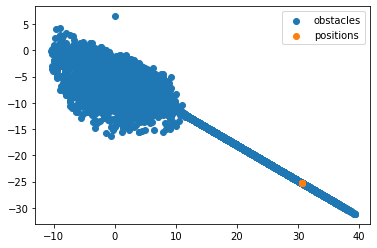

In [10]:
# ASSUMPTION 0: units are in meters, m/s, and degrees
# ASSUMPTION 1: control frequency is 1ms
# ASSUMPTION 2: start our speed and steering at 0
# ASSUMPTION 3: the environment is boundless (no walls)
# ASSUMPTION 4: we have one obstacle to avoid at a time
# ASSUMPTION 5: once we pass an obstacle (|ang| > 90) the next one is spawned
# ASSUMPTION 6: the obstacle spawns at a random distance from the robot between 1-11m
# ASSUMPTION 7: obstacles spawn at a random angle between 0-90
# ASSUMPTION 8: running sim for 10 seconds
# ASSUMPTION 9: assuming singleton input values

#ASSUMPTION 10: Robot starts at 0,0 in the global world frame
#ASSUMPTION 11: obstacles position and angle are mapped in the world frame
#ASSUMPTION 12: The front of the robot is used to determine the angle 0 relative to the world frame
#ASSUMPTION 13: The center of the robot is used as the point of reference for position calculations

dt = 0.001
runtime = 10 # seconds
steps = math.floor(runtime / dt)


speed = 0 
steer = 0
pos = [0, 0]
positions = []
positions.append(pos)
obstacles = []

def gen_random_obstacle(pos, steer):
    # select a random angle between -90 to 90
    ang = np.random.choice(np.arange(-90, 90, 1), size=1)
    # choose a random dist between 1 and 11
    dist = np.random.choice(np.arange(1, 11, 0.5), size=1)
    # offset our angle to be relative to our steering angle
    ang = ang + steer
    dx = np.sin(steer) * dist
    dy = np.cos(steer) * dist
    obstacle = [pos[0] + dx, pos[1] + dy]
    
    return obstacle

def get_input(obstacle, pos, steer):
    #dist = np.linalg.norm(obstacle.pos)
    #Assume  the actual angle uses is the robots headding angle (steer) + pi/2 relative to the world frame
    #Because of this the angle changes
    ang = 90 - np.arctan(obstacle[0]/obstacle[1]) + steer
    dist = np.sqrt((obstacle[1] ** 2) + (obstacle[0] **2))
    return dist, ang

def next_pos(steer, speed, pos, dt):
    step_size = speed * dt
    dx = np.sin(steer) * step_size
    dy = np.cos(steer) * step_size
    pos[0] += dx
    pos[1] += dy
    return pos

angle_sign = 1

for ii in range(steps):
    print("Start step: steer:" + str(steer) + " speed:" + str(speed))
    if (ii == 0):
        print("step#:"+str(ii))
        obstacle = gen_random_obstacle(pos=pos, steer=steer)
        obstacles.append(obstacle)

    # calculate our distance and angle to target to simulate our sensors
    dist, ang = get_input(obstacle, pos, steer)
    print("Ang to Obs:"+str(ang) + " dist:"+ str(dist))


    # our fuzzy system takes positive inputs, so store the sign here to restore it later
    angle_sign = np.sign(ang)

    if abs(ang) > 90:
        obstacle = gen_random_obstacle(pos=pos, steer=steer)
        
        obstacles.append(obstacle)
        dist, ang = get_input(obstacle, pos, steer)

    # run a step of our sim
    ctrl_sim.input['distance'] = dist
    ctrl_sim.input['angle'] = abs(ang)
    ctrl_sim.compute()

    # retrieve our control outputs
    speed = ctrl_sim.output['speed']
    steer = angle_sign * ctrl_sim.output['steer']

    # calculte our updated position
    pos = next_pos(steer=steer, speed=speed, pos=pos, dt=dt)
    positions.append(pos)

obstacles = np.asarray(obstacles)
positions = np.asarray(positions)

plt.figure()
plt.scatter(obstacles[:, 0], obstacles[:, 1], label='obstacles')
plt.scatter(positions[:, 0], positions[:, 1], label='positions')
plt.legend()
plt.show()